In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [2]:
from keras.utils import to_categorical

x_train = x_train.reshape(x_train.shape + (1,))
x_test = x_test.reshape(x_test.shape + (1,))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow(x_train, y_train, batch_size=32)
val_gen = val_datagen.flow(x_test, y_test, batch_size=32)

In [4]:
from keras import models, layers, optimizers

student = models.Sequential()
student.add(layers.Flatten(input_shape=(28, 28, 1)))
student.add(layers.Dense(32, activation='relu'))
student.add(layers.Dense(32, activation='relu'))
student.add(layers.Dense(10))
student.add(layers.Activation('softmax'))

In [12]:
student.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['acc'])

In [13]:
history = student.fit(x_train, y_train, epochs=35, batch_size=32, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/35
60000/60000 [==============================] - 9s 144us/step - loss: 0.3234 - acc: 0.9123 - val_loss: 0.3158 - val_acc: 0.9180
Epoch 2/35
60000/60000 [==============================] - 8s 136us/step - loss: 0.2819 - acc: 0.9216 - val_loss: 0.2739 - val_acc: 0.9272
Epoch 3/35
60000/60000 [==============================] - 9s 148us/step - loss: 0.2640 - acc: 0.9270 - val_loss: 0.2701 - val_acc: 0.9239
Epoch 4/35
60000/60000 [==============================] - 8s 138us/step - loss: 0.2462 - acc: 0.9302 - val_loss: 0.2441 - val_acc: 0.9346
Epoch 5/35
60000/60000 [==============================] - 8s 141us/step - loss: 0.2310 - acc: 0.9333 - val_loss: 0.2623 - val_acc: 0.9317
Epoch 6/35
60000/60000 [==============================] - 8s 140us/step - loss: 0.2210 - acc: 0.9366 - val_loss: 0.2447 - val_acc: 0.9337
Epoch 7/35
60000/60000 [==============================] - 8s 140us/step - loss: 0.2105 - acc: 0.9395 - val_loss: 0.2272 - 

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

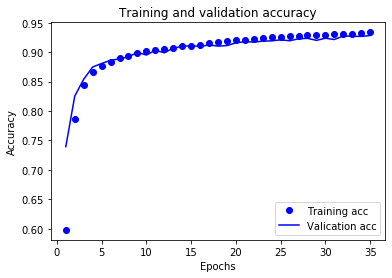

In [8]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Valication acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [9]:
res = student.evaluate(x_test, y_test)
print('Errors: ', 10000 - res[1] * 10000)

10000/10000 [==============================] - 1s 71us/step
Errors:  716.9997692108154


In [14]:
res

[0.26689041370525957, 0.9283000230789185]

In [10]:
student.save('mnist_student.h5')

In [11]:
student.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
